# We are given are csv data of LEGOs we will do analysis on it

<img src="https://i.imgur.com/49FNOHj.jpg">


# Import Statements

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

### Find how many different colours does the LEGO company produce?

In [2]:
df = pd.read_csv('data/colors.csv')
df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
df.tail()

,id,name,rgb,is_trans
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f
134,9999,[No Color],05131D,f


In [7]:
# Find how many different colour LEGO bricks are actually in production
df['name'].nunique()

135

### Find the number of transparent colours versus the number of opaque colours.

In [14]:
# Finding number of transparent and opaque LEGOs
df.groupby('is_trans').count() 

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [16]:

# Alternative approch
df.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

### Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png"> 

### Read the sets.csv data and take a look at the first and last couple of rows. 

In [17]:
set_df = pd.read_csv('data/sets.csv')
set_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [18]:
set_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [19]:
set_df.shape

(15710, 5)

### In which year were the first LEGO sets released and what were these sets called?

In [23]:
# Sorting data in decending order based on year
set_df = set_df.sort_values(by='year')
set_df.head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9544,700.A-1,Small Brick Set (ABB),1949,371,24


In [26]:
# Getting name and year of release
print(set_df['name'].iloc[0])
print(set_df['year'].iloc[0])

Small Doors and Windows Set (ABB)
1949


### How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [32]:
set_df[set_df['year'] == set_df['year'].iloc[0]].shape[0]

5

### Find the top 5 LEGO sets with the most number of parts. 

In [38]:
# Sorting data in decending order based on num_parts
part_set_df = set_df.sort_values(by='num_parts', ascending=False)
part_set_df.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [43]:
# Getting top 5 sets with most number of parts
print(part_set_df['name'].iloc[0:5])

15004    The Ultimate Battle for Chima
11183            UCS Millennium Falcon
10551                  Hogwarts Castle
295                          Taj Mahal
221                          Taj Mahal
Name: name, dtype: object


### show the number of LEGO sets released year-on-year.

In [51]:
sets_by_year = set_df.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [53]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

### Show the number of LEGO releases on a line chart using Matplotlib.


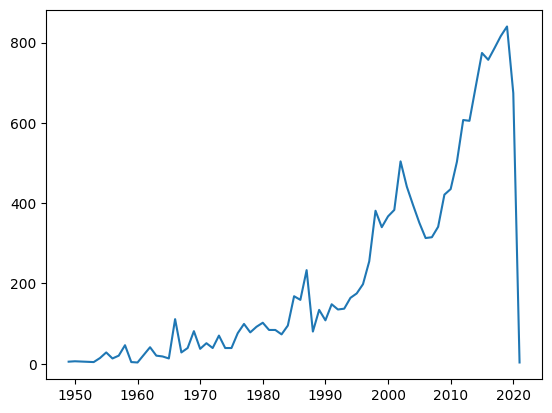

In [54]:
plt.plot(sets_by_year.index, sets_by_year.set_num)

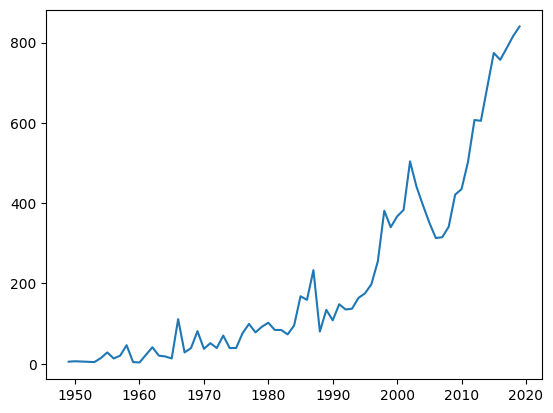

In [55]:
# Excluding the last 2 years
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [58]:
themes_by_year = set_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


### Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

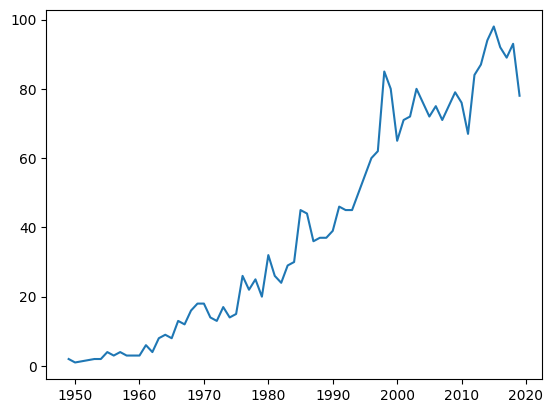

In [59]:
plt.plot(themes_by_year.index[:-2], themes_by_year.theme_id[:-2])

### Line Charts with Two Seperate Axes

AttributeError: 'DataFrame' object has no attribute 'nr_themes'

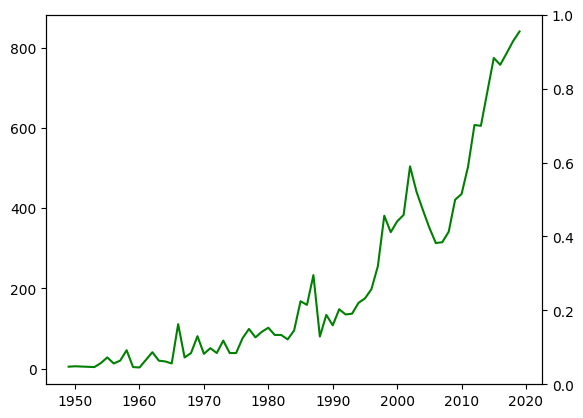

In [66]:

ax1 = plt.gca()
ax2 = ax1.twinx()

# Add styling
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

### Figure out the average number of parts per set

In [68]:
parts_per_set = set_df.groupby('year').agg({'num_parts': pd.Series.mean})
part_set_df.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
